#Import Library


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load Dataset

In [ ]:
url = 'https://drive.google.com/file/d/1aSX6KOE2ziTOiapQgbWuGiqzGK3Ow594/view?usp=share_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

In [ ]:
dataset = pd.read_csv(dwn_url)
print(dataset.tail())

    Tahun_bekerja    Gaji
25            9.0  105582
26            9.5  116969
27            9.6  112635
28           10.3  122391
29           10.5  121872


#Check the General information

In [ ]:
dataset.shape

(30, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tahun_bekerja  30 non-null     float64
 1   Gaji           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


#Handling Missing Values

In [ ]:
dataset.isnull().sum()

Tahun_bekerja    0
Gaji             0
dtype: int64

#Exploratory Data Analysis (EDA)

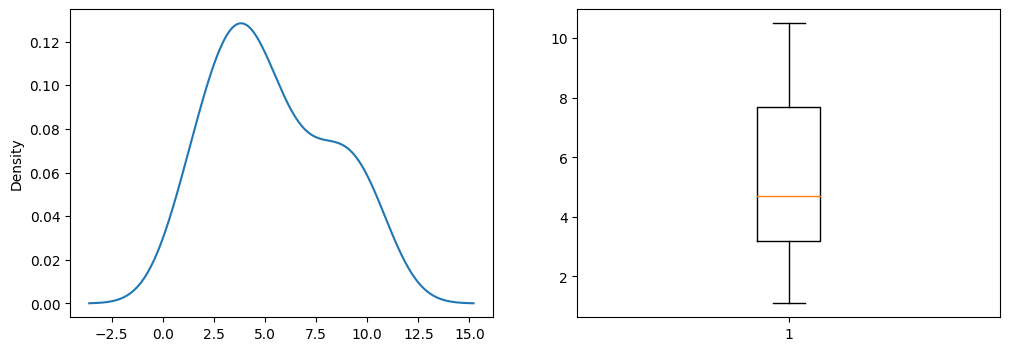

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataset['Tahun_bekerja'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataset['Tahun_bekerja'])
plt.show()

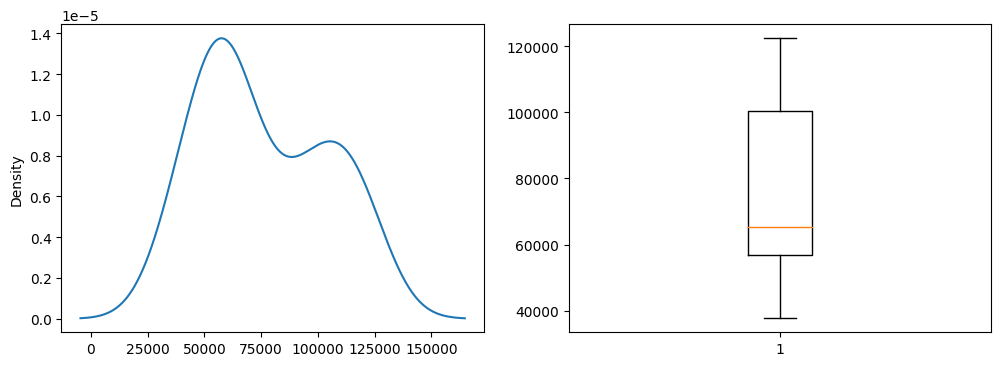

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataset['Gaji'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataset['Gaji'])
plt.show()

In [ ]:
import pandas as pd

# Membuat DataFrame contoh
data = {'Tahun_bekerja': [12, 4],
        'Gaji': [5, 4]}
df = pd.DataFrame(data)

# Menggunakan metode corr() untuk menghitung korelasi
korelasi = df['Tahun_bekerja'].corr(df['Gaji'])

print("Korelasi antara Tahun_bekerja dan Gaji adalah:", korelasi)

Korelasi antara Tahun_bekerja dan Gaji adalah: 0.9999999999999999


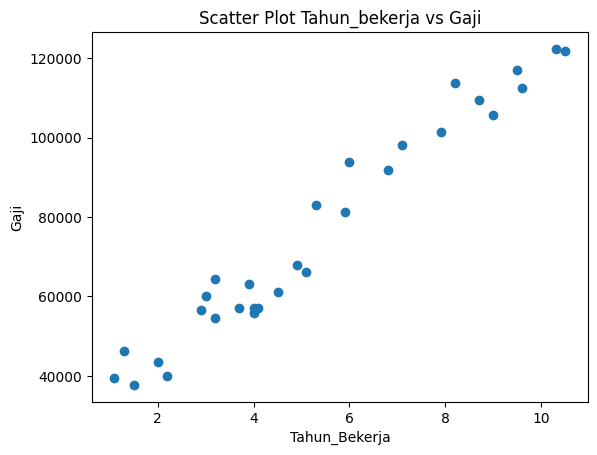

In [ ]:
plt.scatter(dataset['Tahun_bekerja'], dataset['Gaji'])
plt.xlabel('Tahun_Bekerja')
plt.ylabel('Gaji')
plt.title('Scatter Plot Tahun_bekerja vs Gaji')
plt.show()

#Splitting Data

In [ ]:
X = dataset.iloc[:, :-1].values
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
Y = dataset.iloc[:, 1].values
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_train)

(21, 1)
[[ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


#Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[9360.26128619]
26777.391341197625


#Evaluation

In [ ]:
Y_prediksi = lin_reg.predict(X_test)

In [ ]:
df = pd.DataFrame({'aktual': Y_test,'Prediksi': Y_prediksi})
print(df)

   aktual       Prediksi
0   37731   40817.783270
1  122391  123188.082589
2   57081   65154.462615
3   63218   63282.410357
4  116969  115699.873560
5  109431  108211.664531
6  112635  116635.899689
7   55794   64218.436486
8   83088   76386.776158


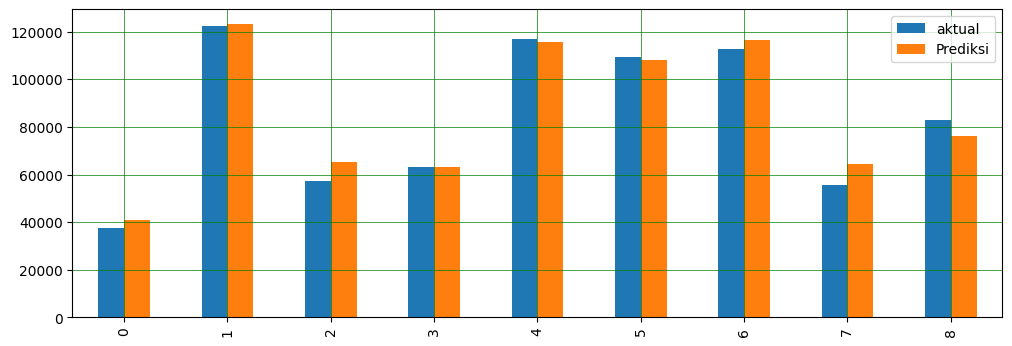

In [ ]:
df.plot(kind='bar',figsize=(12,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_prediksi))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_prediksi))
print('Robot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_prediksi)))


Mean Absolute Error: 3737.417861878896
Mean Squared Error: 23370078.800832972
Robot Mean Squared Error: 4834.260936361728


Text(0.5, 1.0, 'Prediksi Gaji Berdasarkan tahun bekerja (training set)')

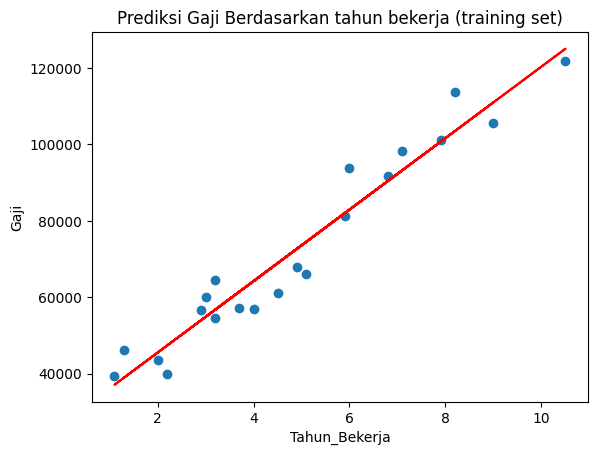

In [ ]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, lin_reg.predict(X_train), c='red')
plt.xlabel('Tahun_Bekerja')
plt.ylabel('Gaji')
plt.title('Prediksi Gaji Berdasarkan tahun bekerja (training set)')


Text(0.5, 1.0, 'Prediksi Gaji Berdasarkan Tahun Bekerja(Testing set)')

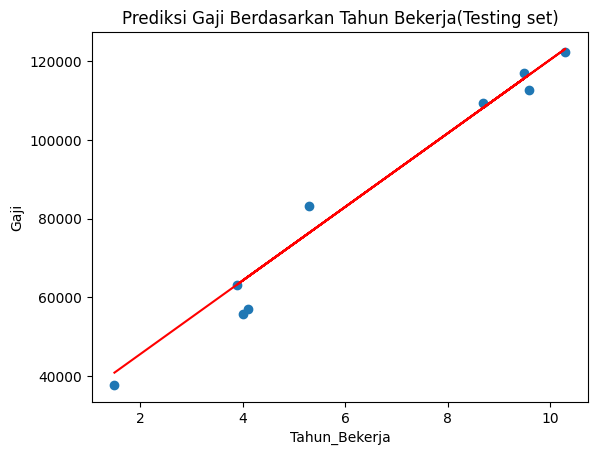

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_prediksi, c='r')
plt.xlabel('Tahun_Bekerja')
plt.ylabel('Gaji')
plt.title('Prediksi Gaji Berdasarkan Tahun Bekerja(Testing set)')


#Prediction

In [ ]:
print('Gaji Seseorang setelah Bekerja selama 2.7 tahun adalah',lin_reg.predict([[2.7]]))
print('Gaji Seseorang setelah Bekerja selama 5.7 tahun adalah',lin_reg.predict([[5.5]]))
print('Gaji Seseorang setelah Bekerja selama 7.7 tahun adalah',lin_reg.predict([[7.5]]))


Gaji Seseorang setelah Bekerja selama 2.7 tahun adalah [52050.09681392]
Gaji Seseorang setelah Bekerja selama 5.7 tahun adalah [78258.82841526]
Gaji Seseorang setelah Bekerja selama 7.7 tahun adalah [96979.35098765]
